# Cars price prediction

Dataset contains technical characteristics, complectation and prices of cars. The goal is to learn model for prediction car prices.   

Importang things are:

- prediction accuracy;
- prediction time;
- fitting time.

## Data Preprocessing

In [1]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
#import librarys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
import lightgbm as lgb
import time
import warnings
warnings.filterwarnings('ignore')


from catboost import CatBoostRegressor, Pool
random_state = 12345

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [4]:
#import data
data = pd.read_csv('/datasets/autos.csv')
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [7]:
data.nunique()

DateCrawled          271174
Price                  3731
VehicleType               8
RegistrationYear        151
Gearbox                   2
Power                   712
Model                   250
Kilometer                13
RegistrationMonth        13
FuelType                  7
Brand                    40
NotRepaired               2
DateCreated             109
NumberOfPictures          1
PostalCode             8143
LastSeen             179150
dtype: int64

In [8]:
#take a look at the missing values percentage
data.isna().mean()

DateCrawled          0.000000
Price                0.000000
VehicleType          0.105794
RegistrationYear     0.000000
Gearbox              0.055967
Power                0.000000
Model                0.055606
Kilometer            0.000000
RegistrationMonth    0.000000
FuelType             0.092827
Brand                0.000000
NotRepaired          0.200791
DateCreated          0.000000
NumberOfPictures     0.000000
PostalCode           0.000000
LastSeen             0.000000
dtype: float64

Text(0.5, 1.05, 'Missing values percentage')

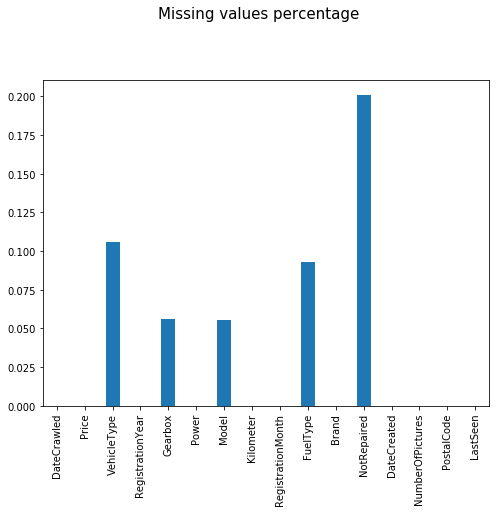

In [9]:
data.isna().mean().plot(kind='bar', figsize=(8,6))
plt.suptitle('Missing values percentage', fontsize=15, y=1.05)

In [10]:
#check up for multicolliniarity
data.corr()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
Price,1.000000,0.026916,0.158872,-0.333199,0.110581,NaN,0.076055
RegistrationYear,0.026916,1.000000,-0.000828,-0.053447,-0.011619,NaN,-0.003459
Power,0.158872,-0.000828,1.000000,0.024002,0.043380,NaN,0.021665
Kilometer,-0.333199,-0.053447,0.024002,1.000000,0.009571,NaN,-0.007698
RegistrationMonth,0.110581,-0.011619,0.043380,0.009571,1.000000,NaN,0.013995
NumberOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostalCode,0.076055,-0.003459,0.021665,-0.007698,0.013995,NaN,1.000000


### Conclusions
During previous data analysis it aapears following:
- NumberOfPictures contains only 0, we shoulld drop it
- column names contain lowercase and uppercase characters at the same time
- missing values in VehicleType, Gearbox, FuelType, NotRepaired columns
- strange values in RegistrationYear, RegistrationMonth, Power columns

In [11]:
#drop most unusefull rows
data = data.drop(data[(data['VehicleType'].isna()) & (data['Model'].isna())].index)
data = data.drop(data[data['Price'] == 0].index)
data = data.drop('NumberOfPictures', axis=1)
data = data.drop('PostalCode', axis=1)
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth
count,338013.000000,338013.000000,338013.000000,338013.000000,338013.000000
mean,4589.470467,2003.755527,111.806241,128467.484978,5.820270
std,4524.247277,65.600165,188.628120,37250.183312,3.679376
min,1.000000,1000.000000,0.000000,5000.000000,0.000000
25%,1200.000000,1999.000000,70.000000,125000.000000,3.000000
50%,2900.000000,2003.000000,105.000000,150000.000000,6.000000
75%,6500.000000,2008.000000,143.000000,150000.000000,9.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000


In [12]:
#get low column names
data.columns = data.columns.str.lower()


In [13]:
#convert to datetime
data_cols = ['datecreated', 'datecrawled', 'lastseen']
for col in data_cols:
    data[col] = pd.to_datetime(data[col], format='%Y%m%d %H:%M:%S')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338013 entries, 0 to 354368
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   datecrawled        338013 non-null  datetime64[ns]
 1   price              338013 non-null  int64         
 2   vehicletype        309847 non-null  object        
 3   registrationyear   338013 non-null  int64         
 4   gearbox            322802 non-null  object        
 5   power              338013 non-null  int64         
 6   model              326076 non-null  object        
 7   kilometer          338013 non-null  int64         
 8   registrationmonth  338013 non-null  int64         
 9   fueltype           311911 non-null  object        
 10  brand              338013 non-null  object        
 11  notrepaired        275625 non-null  object        
 12  datecreated        338013 non-null  datetime64[ns]
 13  lastseen           338013 non-null  datetime

In [14]:
# calculate days before user's last visit
data['seller_activity'] = data['lastseen'] - data['datecreated']
data['seller_activity'] = data['seller_activity'].dt.days

In [15]:
#if car repair is nan then obviuosly there wasn't any repair
data['notrepaired'] = data['notrepaired'].fillna('no')

In [16]:
#fill missing values by grouping some features
data['vehicletype'] = data['vehicletype'].fillna(
    data.groupby(by=['model', 'brand'])['vehicletype'].transform('last'))
        
data['fueltype'] = data['fueltype'].fillna(
    data.groupby(by=['model', 'brand', 'power'])['fueltype'].transform('last'))

data['gearbox'] = data['gearbox'].fillna(
    data.groupby(by=['model', 'brand', 'power'])['gearbox'].transform('last'))
        
data['model'] = data['model'].fillna(
    data.groupby(by=['vehicletype', 'brand', 'power'])['model'].transform('last'))



In [17]:
#fix inadequate values about registartion year
filter_regyear = data[(data['registrationyear'] > 2019) | (data['registrationyear'] < 1910)].index        
data['registrationyear'].loc[filter_regyear] = data.groupby(
    by='kilometer')['registrationyear'].transform('mean')
filter_regyear2 = data[data['registrationyear'] > 2019].index 
data['registrationyear'].loc[filter_regyear2] = 2015
        

In [18]:
#... registartion month
filter_regmonth = data[data['registrationmonth'] == 0].index
data['registrationmonth'].loc[filter_regmonth] = 12

In [19]:
#the same for power values
filter_power_1 = data[(data['power'] < 2000) & (data['power'] > 500)].index
data['power'].loc[filter_power_1] =  data['power'] / 10
        
filter_power_2 = data[data['power'] >= 2000].index
data['power'].loc[filter_power_2] =  data['power'] / 100

filter_power_3 = data[data['power'] < 30].index
data['power'].loc[filter_power_3] = data.groupby(by=['model'])['power'].transform('mean')      
        
filter_power_4 = data[data['power'] == 0].index
data['power'].loc[filter_power_4] = 100

In [20]:
#calculate car age
data['age'] = pd.DatetimeIndex(data['datecreated']).year - data['registrationyear']

data['age_sqr'] = data['age'] ** 2

#drop datetime columns
data = data.drop(['datecrawled','lastseen', 'datecreated', 'registrationyear', 'registrationmonth'], axis=1)

Text(0.5, 1.05, 'Car ages scatterplot')

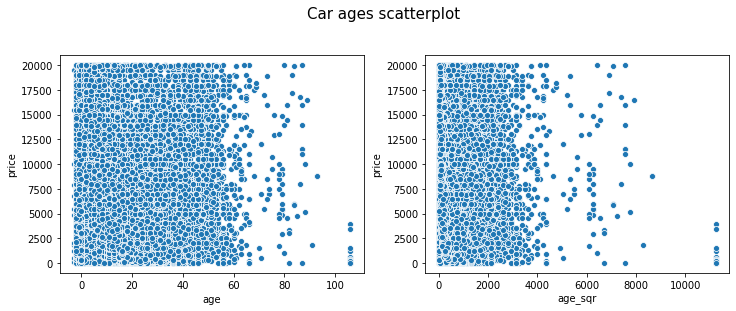

In [21]:
#look at the age distribution

fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.scatterplot(data=data, x='age', y='price', ax=ax[0])
sns.scatterplot(data=data, x='age_sqr', y='price', ax=ax[1])
plt.suptitle('Car ages scatterplot', fontsize=15, y=1.05)

In [22]:
data.corr()

,price,power,kilometer,seller_activity,age,age_sqr
price,1.000000,0.509422,-0.359582,0.147051,-0.391566,-0.222583
power,0.509422,1.000000,0.095370,0.059461,-0.099440,-0.099647
kilometer,-0.359582,0.095370,1.000000,-0.071375,0.202853,0.049962
seller_activity,0.147051,0.059461,-0.071375,1.000000,-0.013163,0.005269
age,-0.391566,-0.099440,0.202853,-0.013163,1.000000,0.854184
age_sqr,-0.222583,-0.099647,0.049962,0.005269,0.854184,1.000000


In [23]:
#brake off features and targets from dataset
X = data.drop('price', axis =1)
y = pd.DataFrame(data['price'])

In [24]:
y = y.astype('float')
y.shape

(338013, 1)

Text(0.5, 1.05, 'Targets distribution')

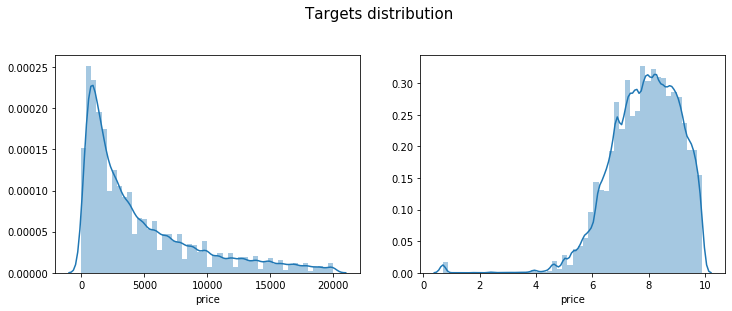

In [25]:
#plot targets distribution
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.distplot(y['price'], ax=ax[0])
sns.distplot(np.log(y[('price')]+1), ax=ax[1])
plt.suptitle('Targets distribution', fontsize=15, y=1.05)

In [26]:
#select categorical columns
categorical_cols = [col for col in X.columns if X[col].nunique() < 10 and X[col].dtype == 'object']
categorical_cols

['vehicletype', 'gearbox', 'fueltype', 'notrepaired']

In [27]:
categorical_cols_10 = [col for col in X.columns if X[col].nunique() >= 10 and X[col].dtype == 'object']
categorical_cols_10


['model', 'brand']

In [28]:
#select numerical columns
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
numerical_cols

['power', 'kilometer', 'seller_activity', 'age', 'age_sqr']

In [29]:
X = X[categorical_cols + categorical_cols_10 + numerical_cols].copy()


In [30]:
#prepare categorical features for model fitting
categorical_suffix = "_cat"
for col in categorical_cols + categorical_cols_10:
    X[col + categorical_suffix] = X[col].astype('category')
    X = X.drop(col, axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338013 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   power            337382 non-null  float64 
 1   kilometer        338013 non-null  int64   
 2   seller_activity  338013 non-null  int64   
 3   age              338013 non-null  float64 
 4   age_sqr          338013 non-null  float64 
 5   vehicletype_cat  338013 non-null  category
 6   gearbox_cat      336904 non-null  category
 7   fueltype_cat     334991 non-null  category
 8   notrepaired_cat  338013 non-null  category
 9   model_cat        335452 non-null  category
 10  brand_cat        338013 non-null  category
dtypes: category(6), float64(3), int64(2)
memory usage: 25.8 MB


In [31]:
categorical_cols = [col for col in X.columns if X[col].nunique() < 10 and X[col].dtype == 'category']
categorical_cols

['vehicletype_cat', 'gearbox_cat', 'fueltype_cat', 'notrepaired_cat']

In [32]:
categorical_cols_10 = list(set(X.columns) - set(categorical_cols) - set(numerical_cols))
categorical_cols_10

['brand_cat', 'model_cat']

In [33]:
#split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

## Machine Learning

### Linear Regression

In [34]:
#features preprocess
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [35]:
categorical_transformer_10 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

In [36]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
    

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('cat_10', categorical_transformer, categorical_cols_10) 
        
    ])
#yes, I intendently preprocessed all categorical features with OneHotEncoder
#in this case it not increases fitting time, but significantly improve metric value (in compare with OrdinalEncoder)

In [38]:
model = LinearRegression()

In [39]:
pipe = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', model)
])

In [40]:
#fit the model and check the execution time
%%time
start = time.time()
pipe.fit(X_train, y_train)
end = time.time()
lr_fit_time = end - start

CPU times: user 32.1 s, sys: 34.8 s, total: 1min 6s
Wall time: 1min 7s


In [41]:
start = time.time()
preds = pipe.predict(X_test)
end = time.time()
lr_pred_time = end - start

In [42]:
lr_RMSE = (mean_squared_error(y_test, preds) ** .5)
print('Linear_Regression_RMSE:', lr_RMSE)

Linear_Regression_RMSE: 2698.201499052767


### LightGBMRegressor

Lets try LightGBMRegressor and CatBoosterRegressor alghorytms. Both of them are well-known for their own categorical encoders. But it apperars that SKlearn Pipeline changes data structure at running time. And when the model meets our data it don't know if this features categorical or not. There are some solvers for this problem (like this https://medium.com/analytics-vidhya/combining-scikit-learn-pipelines-with-catboost-and-dask-part-2-9240242966a7). But in this case we will just learn boosting models aside from Pipline.  

In [43]:
#try LGBMRegressor
model= lgb.LGBMRegressor(
    learning_rate=0.18,
    n_estimators=300,
    max_depth=10,
    random_state=random_state,
    categorical_feature='auto')

In [44]:
%%time
start = time.time()
model.fit(X_train, y_train)
end = time.time()
lgbmr_fit_time = end - start

CPU times: user 16.3 s, sys: 0 ns, total: 16.3 s
Wall time: 16.4 s


In [45]:
start = time.time()
preds = model.predict(X_test)
end = time.time()
lgbmr_pred_time = end - start

In [46]:
lgbmr_RMSE = mean_squared_error(y_test, preds) ** .5
print('lightGBMRegressor RMSE:', lgbmr_RMSE)

lightGBMRegressor RMSE: 1586.9439833276651


### CatBoosterRegressor

In [47]:
#the same for CatBoostRegressor
model= CatBoostRegressor(learning_rate=0.18, n_estimators=100, max_depth=10, random_state=random_state)

In [48]:
cat = categorical_cols + categorical_cols_10

In [49]:
#we should fill missin values before fitting this model
imp = SimpleImputer(strategy='most_frequent')
X_train = pd.DataFrame(imp.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(imp.transform(X_test), columns = X.columns)

In [50]:
%%time
start = time.time()
model.fit(X_train, y_train, cat_features = cat)
end = time.time()
cb_fit_time = end - start

0:	learn: 3974.5916887	total: 367ms	remaining: 36.3s
1:	learn: 3532.2899933	total: 768ms	remaining: 37.6s
2:	learn: 3185.2050811	total: 1.16s	remaining: 37.6s
3:	learn: 2914.7018695	total: 1.56s	remaining: 37.6s
4:	learn: 2706.9608679	total: 1.87s	remaining: 35.5s
5:	learn: 2547.6464915	total: 2.26s	remaining: 35.5s
6:	learn: 2400.7905948	total: 2.57s	remaining: 34.2s
7:	learn: 2291.1672597	total: 2.96s	remaining: 34.1s
8:	learn: 2208.7720092	total: 3.36s	remaining: 33.9s
9:	learn: 2138.6579217	total: 3.66s	remaining: 33s
10:	learn: 2088.4065193	total: 4.06s	remaining: 32.8s
11:	learn: 2037.6784991	total: 4.36s	remaining: 32s
12:	learn: 1998.9864107	total: 4.75s	remaining: 31.8s
13:	learn: 1958.9793659	total: 5.07s	remaining: 31.1s
14:	learn: 1933.3193583	total: 5.46s	remaining: 30.9s
15:	learn: 1909.4109940	total: 5.76s	remaining: 30.3s
16:	learn: 1891.9581636	total: 6.16s	remaining: 30.1s
17:	learn: 1876.6908969	total: 6.55s	remaining: 29.9s
18:	learn: 1860.0694242	total: 6.86s	remai

In [51]:
start = time.time()
cb_RMSE = mean_squared_error(y_test, model.predict(X_test)) ** .5
end = time.time()
cb_pred_time = end - start

In [52]:
print('CatBoostRegressor RMSE:', cb_RMSE)

CatBoostRegressor RMSE: 1661.4023699083327


In [53]:
# try to find optimal hyperparameters by greedsearch from CatBoost


model = CatBoostRegressor(cat_features = cat)

grid = {'learning_rate': [0.1, 0.18],
        'depth': [6, 10]}

grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train,
                                       plot=True)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 1644.3548884	best: 1644.3548884 (0)	total: 6m 44s	remaining: 20m 13s
1:	loss: 1629.6074383	best: 1629.6074383 (1)	total: 13m 30s	remaining: 13m 30s
2:	loss: 1591.1291719	best: 1591.1291719 (2)	total: 26m 58s	remaining: 8m 59s
3:	loss: 1586.3055980	best: 1586.3055980 (3)	total: 40m 30s	remaining: 0us
Estimating final quality...


## Models Analysis

In [59]:
#run the dummy test
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_test)
dummy_score = mean_squared_error(y_test, dummy_regr.predict(X_test)) ** .5
print('Dummy_score:', dummy_score)

Dummy_score: 4498.384423623961


By this we can say that all our model passes  dummy test 

In [61]:
#put all metrics together and check out the results
metrics = [lr_RMSE, lgbmr_RMSE, cb_RMSE]
fit_times = [lr_fit_time, lgbmr_fit_time, cb_fit_time]
pred_times = [lr_pred_time, lgbmr_pred_time, cb_pred_time]
metrics = pd.DataFrame([metrics, fit_times, pred_times],
                       columns = ['LinearRegression', 'LightGBMRegressor', 'CatBoosterRegressor'],
                       index = ['RMSE', 'fit_times', 'pred_times'])

metrics


,LinearRegression,LightGBMRegressor,CatBoosterRegressor
RMSE,2698.201499,1586.943983,1661.402370
fit_times,67.030924,16.372870,37.729006
pred_times,0.207844,1.214079,0.183055


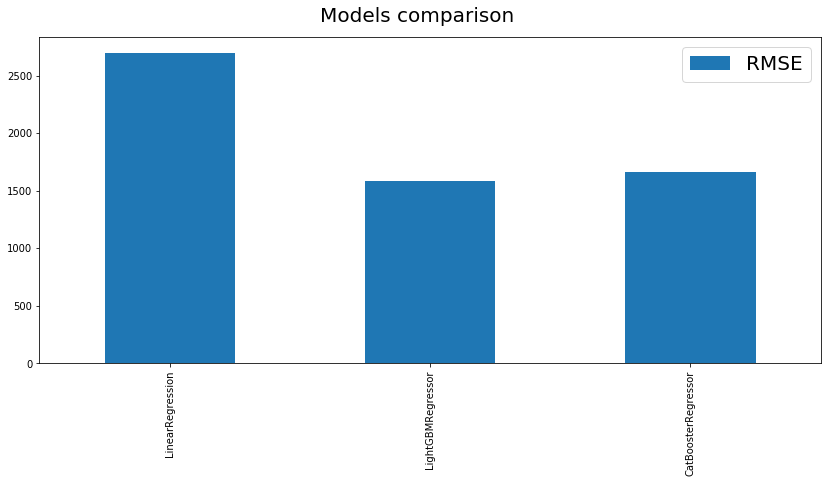

In [62]:
def plot_results(data):
    data.plot(figsize=(14,6), kind='bar')
    plt.suptitle('Models comparison', fontsize=20, y=.95)
    plt.legend(loc=1, prop={'size': 20})
    
    
plot_results(metrics.loc['RMSE'])

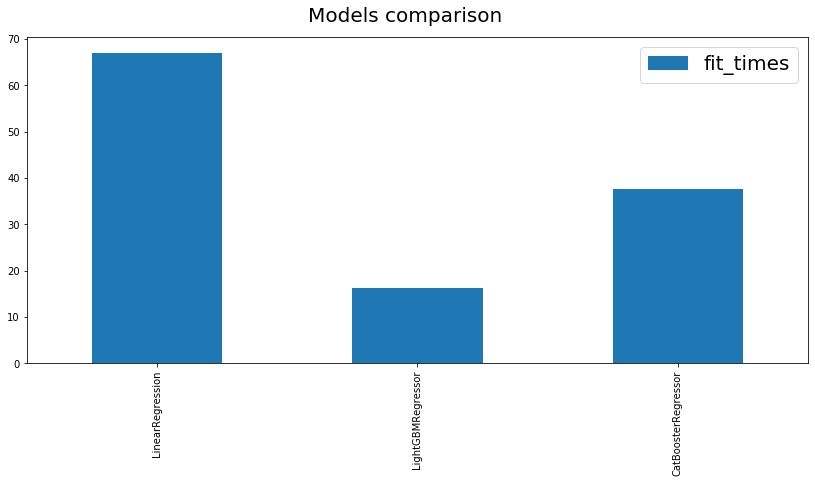

In [57]:
plot_results(metrics.loc['fit_times'])

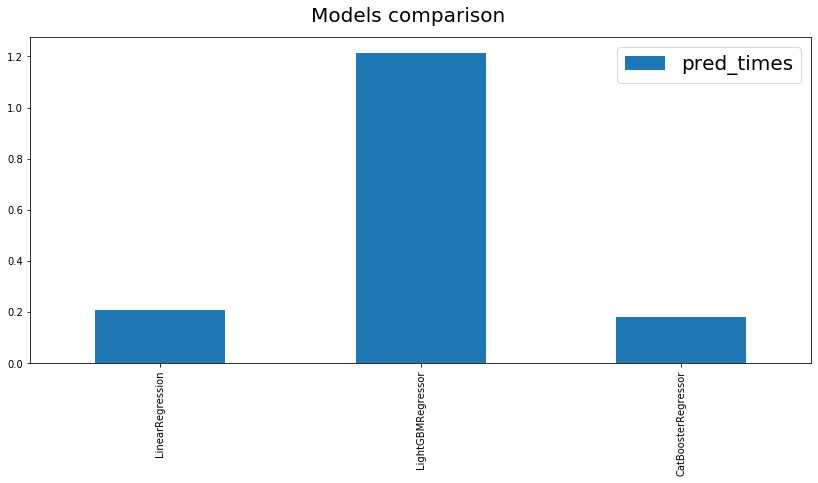

In [63]:
plot_results(metrics.loc['pred_times'])

## General Conclusion

In this project we built three models to predict car prices. The most accuracy results shows LightGBMRegressor. A fitting time is also the best, but the time of prediction is worse than others. Mean squared error of CatBoosterRegressor model is almost as good as previous one and it beats others in prediction time. Suddenly, LinearRegression shows worst time (maybe cause of pipeline) and worst metric value. Putting all together we can say that optimal models for prediction car prices could be picked from LightGBMRegressor or CatBoosterRegressor.

